 # ESTADÍSTICA 2.  PRÁCTICA 6.
 ## Autor: Jesús Octavio Raboso.
 
Los enunciados del ejercicio aparecerán en negrita, cursiva y color azul. El resto de anotaciones (explicativas y personales) no seguirán ese estilo.

In [1]:
# Load required libraries:
if (!require("foreach")) install.packages("foreach")
if (!require("RColorBrewer")) install.packages("RColorBrewer")
if (!require("stats4")) install.packages("stats4")
if (!require("crayon")) install.packages("crayon")

Loading required package: foreach
Loading required package: RColorBrewer
Loading required package: stats4
Loading required package: crayon


<font color='blue'>***1. - Crea una función a la que se pase como input: un vector “x” de features distribuidos uniformemente, unos valores “a” y “b” parámetros de un modelo lineal “y = a + b * x”, y parámetros “m” y “n” que nos den la sigma de una distribución gaussiana: “sigma = m + n * x^2”. La función debe devolver una matriz que contenga en la primera columna un vector con el término independiente “y = a + b * x + gauss(0, sigma = m + n * x^2)”, y en la segunda columna la “sigma = m + n * x^2”. Nota: Este ejercicio es igual al que ya realizamos, salvo porque ahora la sigma del término estocástico depende de cada punto.***</font>


Dado un vector $\boldsymbol{x}=[x_{1},x_{2},...,x_{N}]$ de features distribuido uniformemente y dos parámetros $a,b\in\mathbb{R}$, generamos un modelo lineal tal que $y_{i} = a+b\cdot x_{i}$ siendo $\boldsymbol{y}=[y_{1},y_{2},...,y_{N}]$. Es decir: 
$$\boldsymbol{y} = a + b \cdot \boldsymbol{x}.$$

Dados dos parámetros $m,n\in\mathbb{R}$, generamos el términ0 estocástico $\boldsymbol{\sigma} = m + n\cdot \boldsymbol{x}^{2}.$





In [2]:
my_dist <- function(x, a, b, m, n){
    
    #
    # Given a random uniformly distributed vector x and paremeters a, b, generates linear model
    # y = a*x + b.
    # Given a random uniformly distributed vector x and parameters m, n, calculates 
    # sigma = m+n+x^2 for normal distribution with mean = 0.
    # Return independent term y=a+b*x+ gauss(0, sigma) and sigma.
    #
    # @description Creates distributon y=a+b*x+ gauss(0, sigma=m+n+x^2)
    # 
    #
    # @param x: float vector. Random uniformly distributed vector.
    # @param a: float. Parameter for linear model y = a + b*x.
    # @param b: float. Parameter for linear model y = a + b*x.
    # @param m: float. Parameter for sigma = m + n * x^2 (normal distribution)
    # @param n: float. Parameter for sigma = m + n * x^2 (normal distribution)
    #
    # @return : Given N=length(x), returns an Nx2 matrix whose first column is y=a+b*x+ gauss(0, sigma); whose
    # second column is m + n *x^2.
    #
    
    sigma <- m + n * x^2
    normal <- rnorm(length(x), mean = 0, sd = sigma)
    y = a + b*x + normal    
    
    return(data.frame(y= y, sigma = sigma))
}

<font color='blue'>***2. - Crea una función que encuentre el valor de los parámetros que hace máximo el ML usando la fórmula análitica.***</font>

Buscamos el vector de parámetros $\hat{\boldsymbol{\theta}}$ tal que la función de coste:
$$\sum_{i}\left(\frac{y_{i}- x_{i}^{T}\boldsymbol{\theta}}{\sigma_{i}}\right)^{2}$$
sea máximo.

In [3]:
max_ml <- function(X, y, theta, sigma){
    
    
    #
    # @description Maximize likelihooh function
    #
    # @param X: float matrix. Features matrix including 1s vector.
    # @param y: float vector. Model y = a + b*x+ gauss(0, sigma=m+n+x^2)
    # @param theha: float vector. Vector of coefficients,
    # @param sigma: floar vector. sigma=m+n+x^2
    #
    # @return float vector. Vector with coefficients that maximize likelihoob
    # function. 
    #
    
    cov_inv <- solve(diag(sigma^2))
    return(solve(t(X) %*% cov_inv %*% X) %*% (t(X) %*% cov_inv) %*% y)
}

<font color='blue'>***3. - Crea un vector x distribuido uniformemente en [0, 10], y encuentra el mínimo para a = 1, b = 2, m = 0.1 y n = 0.04. Pinta los datos, sus errores y la recta de ajuste.***</font>

In [4]:
# Number of elements
N <- 100

In [5]:
# Create random uniformly distributed vector with N elements between 0 and 10
x <- runif(n = N, min = 0, max = 10)

# Set featurematrix (with 1's vector)
X <- cbind(1, x)

In [6]:
# Set model marameters
a <- 1
b <- 2
m <- 0.1
n <- 0.04

# Invoke function to create model
dist_df <- my_dist(x = x, a = a, b = b, m = m, n = n)

In [7]:
# Set sigma
sigma <- dist_df$sigma

In [8]:
# Set y
y <- dist_df$y

In [9]:
# Set theta (vector of coefficients)
theta <- c(a, b)

In [10]:
# Calculate \hat{\theta}
theta_max <- max_ml(X = X, y = y, theta = theta, sigma = sigma)
theta_max

,0.9531892
x,2.0615172


In [11]:
y_hat <- X %*% theta_max

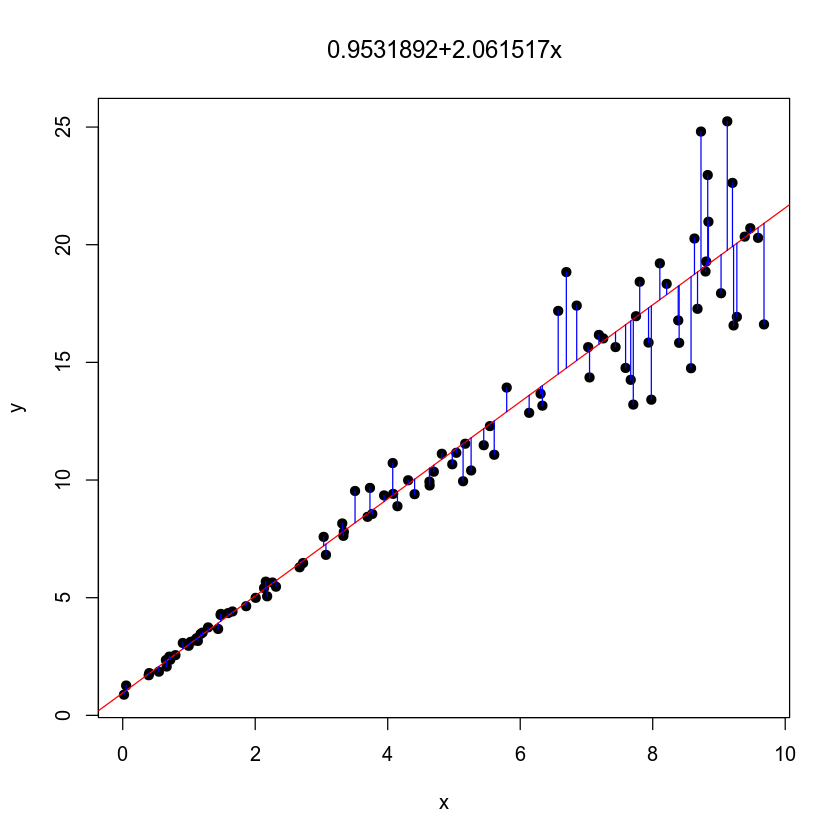

In [12]:
# Plot points, regression line and error
plot(y ~ x, pch = 19,
     main = substitute(paste(a0,'+', a1, 'x'), 
                        list(a0 = theta_max[1], a1 = theta_max[2])))
abline(theta_max[1], theta_max[2], col = 'red')
segments(x0 = x, x1 = x, y = y, y1 = y_hat, col = 'blue')

<font color='blue'>***4. - Genera un vector con 10000 números distribuidos exponencialmente con un valor de rate = 1/5.27. Crea un histograma con este vector usando como rango [0, 30] y con una anchura de bin = 1.***</font>

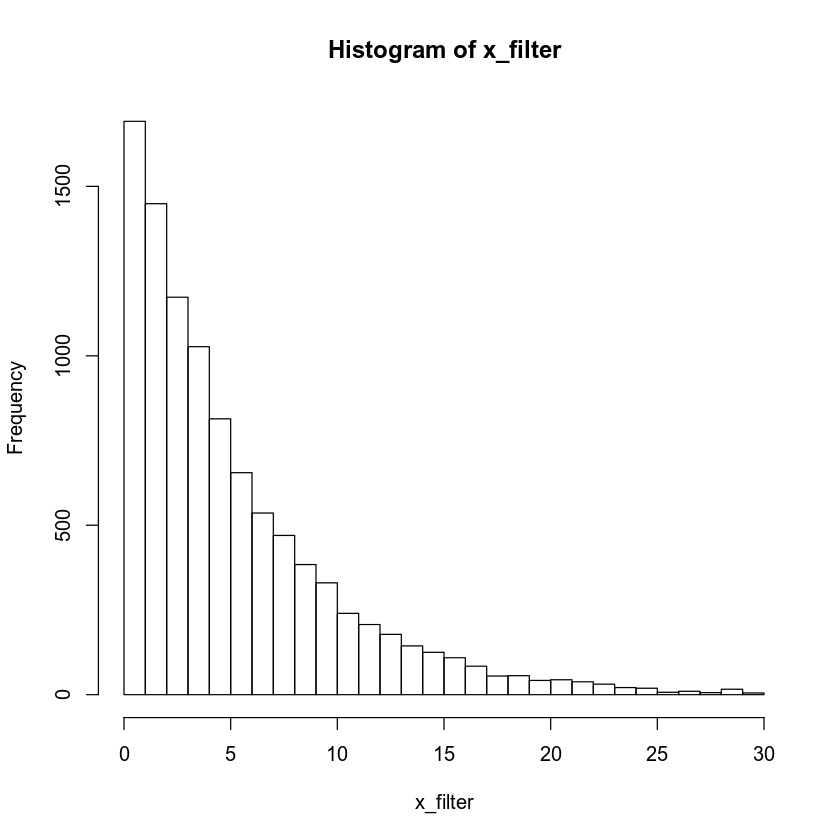

In [13]:
# Set sample size
N <- 10000

# Set exponential rate
rate <- 1 / 5.27
x <- rexp(n = N, rate = rate)

# Filter as required to avoid errors
x_filter <- x[x >= 0 & x <= 30]
N_filter <- length(x_filter)

# Plot histogram
# my_hist <- hist(x, breaks = 30)
my_hist <- hist(x_filter, breaks = 30)

In [14]:
str(my_hist)

List of 6
 $ breaks  : num [1:31] 0 1 2 3 4 5 6 7 8 9 ...
 $ counts  : int [1:30] 1692 1449 1173 1027 814 655 536 470 384 330 ...
 $ density : num [1:30] 0.1698 0.1454 0.1177 0.103 0.0817 ...
 $ mids    : num [1:30] 0.5 1.5 2.5 3.5 4.5 5.5 6.5 7.5 8.5 9.5 ...
 $ xname   : chr "x_filter"
 $ equidist: logi TRUE
 - attr(*, "class")= chr "histogram"


In [15]:
n <- my_hist$counts # Bins heights
t <- my_hist$mids   # Midpoint of interval covered by each bin
n_len <- length(n)

<font color='blue'>***5. - Escribe una función que tome como input el valor “N” y “lambda” de una exponencial: “N * exp(-t/lambda)”, y calcula el “l” asociado al valor del likelihood para este modelo y este histograma.***</font>

Consideremos una variable aleatoria Poisson cuya pdf está definida como:
$$poisson(n, \lambda) = \frac{e^{-\lambda}\cdot \lambda^{n}}{n!}.$$

Dado un histograma con $M$ bins, sea $\{n_{i}\}_{i=1}^{M}$ la altura del i-ésimo bin; sea $\{t_{i}\}_{i=1}^{M}$ el punto medio del i-ésimo bin.

Dada una muestra de tamaño N, el la pdf en cada uno de los bines está dada por:
$$poisson(n_{i}, Ne^{-\frac{t_{i}}{\lambda}}).$$

Consideramos la función de verosimilitud:
$$L(N,\lambda; x) = \prod_{i=1}^{M}poisson(n_{i}, Ne^{-\frac{t_{i}}{\lambda}})$$

Hallamos el valor $q$:
$$\begin{align}
q &= -\log(L) \\
  &= -\log(\prod_{i=1}^{M}poisson(n_{i}, Ne^{-\frac{t_{i}}{\lambda}})) \\
  &= -\sum_{i=1}^{M}(\log(poisson(n_{i}, Ne^{-\frac{t_{i}}{\lambda}})))) \\
  &= -\sum_{i=1}^{M}(\log(\frac{e^{-(Ne^{-t_{i}/\lambda})}\cdot (Ne^{-t_{i}/\lambda})^{n_{i}}}{n_{i}!})) \\
  &= \sum_{i=1}^{M}(Ne^{-t_{i}/\lambda} - n_{i}\log{N} + \frac{n_{i}t_{i}}{\lambda} + log(n_{i}!)) 
\end{align}$$

In [16]:
# Negative Log Likelihood
nll <- function(N, lambda){
    
    #
    # @description: computes negative log likelihoood.
    #
    # @param N: int. Model parameter.
    # @parma lambda: float. Model parameter.
    #
    # @return l: float, Negative log likelihood value
    #
    
    l <- - sum(n*log(N)) + (N*sum(exp(-t/lambda))) + sum(n*t)/lambda + sum(lfactorial(n))
    return(l)
}

<font color='blue'>***6.- Utiliza la función mle para hallar los valores de “N” y “lambda” que maximizan el likelihood. Usa como valores iniciales 4000 y 4. Pinta el histograma y la función exponencial ajustada.***</font>

In [17]:
# Maximum likelihood estimator
# Try other values
r <- mle(minuslogl = nll, 
            start = list(N = 4000, lambda = 4), # initial values
            method = "BFGS")

In [18]:
r@coef

N      lambda 
2855.102393    4.162449

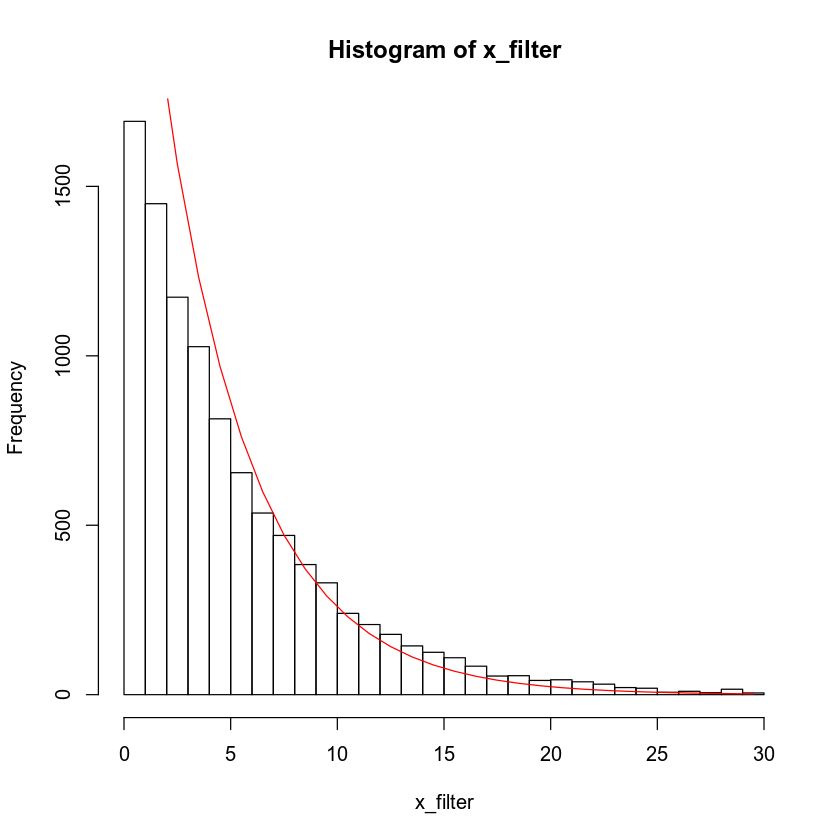

In [19]:
# Plot hist and fitting curve
my_hist <- hist(x_filter, breaks = 30)
lines(t, r@coef[[1]]*exp(-t / r@coef[[2]]), col = "red")

¿Qué ocurre si fijamos otros valores iniciales?

Cambiamos N y fijamos lambda:

Initial values: N_0 = 1000 ; Lambda_0 = 4
Values after MLE: N = 1904.11650575591 ; Lambda = 5.25986123793501
 
Initial values: N_0 = 1500 ; Lambda_0 = 4
Values after MLE: N = 1903.27206312495 ; Lambda = 5.26109842214238
 
Initial values: N_0 = 2000 ; Lambda_0 = 4
Values after MLE: N = 1904.15944996915 ; Lambda = 5.25980268738184
 
Initial values: N_0 = 2500 ; Lambda_0 = 4
Values after MLE: N = 2092.98807051185 ; Lambda = 4.98227485423118
 
Initial values: N_0 = 3000 ; Lambda_0 = 4
Values after MLE: N = 2236.00613184766 ; Lambda = 4.79896578585013
 
Initial values: N_0 = 3500 ; Lambda_0 = 4
Values after MLE: N = 2076.67270591834 ; Lambda = 5.00435392064592
 
Initial values: N_0 = 4000 ; Lambda_0 = 4
Values after MLE: N = 2855.10239277069 ; Lambda = 4.16244946632525
 
Initial values: N_0 = 4500 ; Lambda_0 = 4
Values after MLE: N = 2872.74509836896 ; Lambda = 4.2922353528497
 
Initial values: N_0 = 5000 ; Lambda_0 = 4
Values after MLE: N = 2273.37117228951 ; Lambda = 4.7543257824856
 


[[1]]
NULL

[[2]]
NULL

[[3]]
NULL

[[4]]
NULL

[[5]]
NULL

[[6]]
NULL

[[7]]
NULL

[[8]]
NULL

[[9]]
NULL

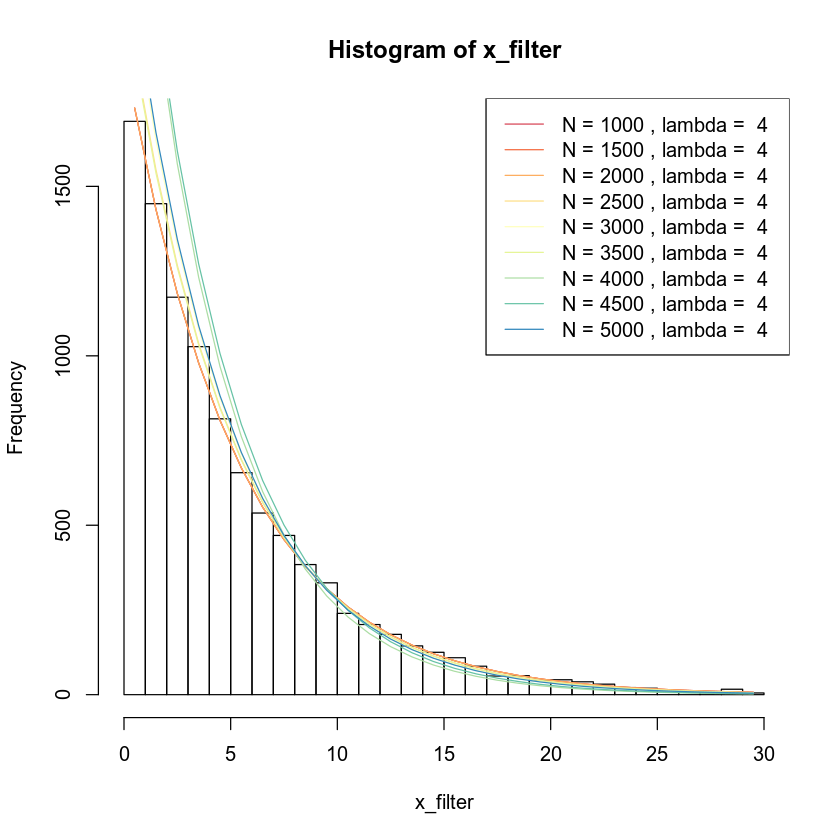

In [20]:
# Set N values
N_iter <- seq(from = 1000, to = 5000, by = 500)

# set lambda values
lambda_iter <- rep(4, length(N_iter))

# Color palette
cols <- brewer.pal(length(N_iter), 'Spectral')

# Plot histogram
my_hist <- hist(x_filter, breaks = 30)

# Cosider each (N, lambda) tuple
foreach (N = N_iter, lambda = lambda_iter, i = c(1:length(N_iter))) %do% {
    
    # Maximum likelihood estimator
    mle_res <- mle(minuslogl = nll, 
                     start = list(N = N, lambda = lambda), 
                     method = "BFGS")
        
    cat(bold(red(paste("Initial values: N_0 =", N, "; Lambda_0 =", lambda))))
    cat("\n")
    cat(bold(green(paste("Values after MLE: N =", mle_res@coef[[1]], "; Lambda =", mle_res@coef[[2]]))))
    cat("\n", "\n")
    
    # Overlap lines
    lines(t, mle_res@coef[[1]]*exp(-t / mle_res@coef[[2]]), 
              col = cols[i])
}

# Add legend
legend("topright", lty = 1,
       c(paste('N =', N_iter[1], ', lambda = ', lambda_iter[1]),
         paste('N =', N_iter[2], ', lambda = ', lambda_iter[2]),
         paste('N =', N_iter[3], ', lambda = ', lambda_iter[3]),
         paste('N =', N_iter[4], ', lambda = ', lambda_iter[4]),
         paste('N =', N_iter[5], ', lambda = ', lambda_iter[5]),
         paste('N =', N_iter[6], ', lambda = ', lambda_iter[6]),
         paste('N =', N_iter[7], ', lambda = ', lambda_iter[7]),
         paste('N =', N_iter[8], ', lambda = ', lambda_iter[8]),
         paste('N =', N_iter[9], ', lambda = ', lambda_iter[9])),
         col = cols[1:length(N_iter)])

Fijamos N y cambiamos lambda:

Initial values: N_0 = 3000 ; Lambda_0 = 4
Values after MLE: N = 2236.00613184766 ; Lambda = 4.79896578585013
 
Initial values: N_0 = 3000 ; Lambda_0 = 4.25
Values after MLE: N = 2192.75586800644 ; Lambda = 4.8524272286258
 
Initial values: N_0 = 3000 ; Lambda_0 = 4.5
Values after MLE: N = 2160.55508919262 ; Lambda = 4.89338808089955
 
Initial values: N_0 = 3000 ; Lambda_0 = 4.75
Values after MLE: N = 2244.23245869251 ; Lambda = 4.78901219144203
 
Initial values: N_0 = 3000 ; Lambda_0 = 5
Values after MLE: N = 1993.85864416816 ; Lambda = 5.12095462630004
 
Initial values: N_0 = 3000 ; Lambda_0 = 5.25
Values after MLE: N = 2225.43048446335 ; Lambda = 4.81186479684672
 
Initial values: N_0 = 3000 ; Lambda_0 = 5.5
Values after MLE: N = 2139.20218445387 ; Lambda = 4.92105250286261
 
Initial values: N_0 = 3000 ; Lambda_0 = 5.75
Values after MLE: N = 2104.24753513706 ; Lambda = 4.96718422859032
 
Initial values: N_0 = 3000 ; Lambda_0 = 6
Values after MLE: N = 2145.84659782738 ; Lambda = 4.912

[[1]]
NULL

[[2]]
NULL

[[3]]
NULL

[[4]]
NULL

[[5]]
NULL

[[6]]
NULL

[[7]]
NULL

[[8]]
NULL

[[9]]
NULL

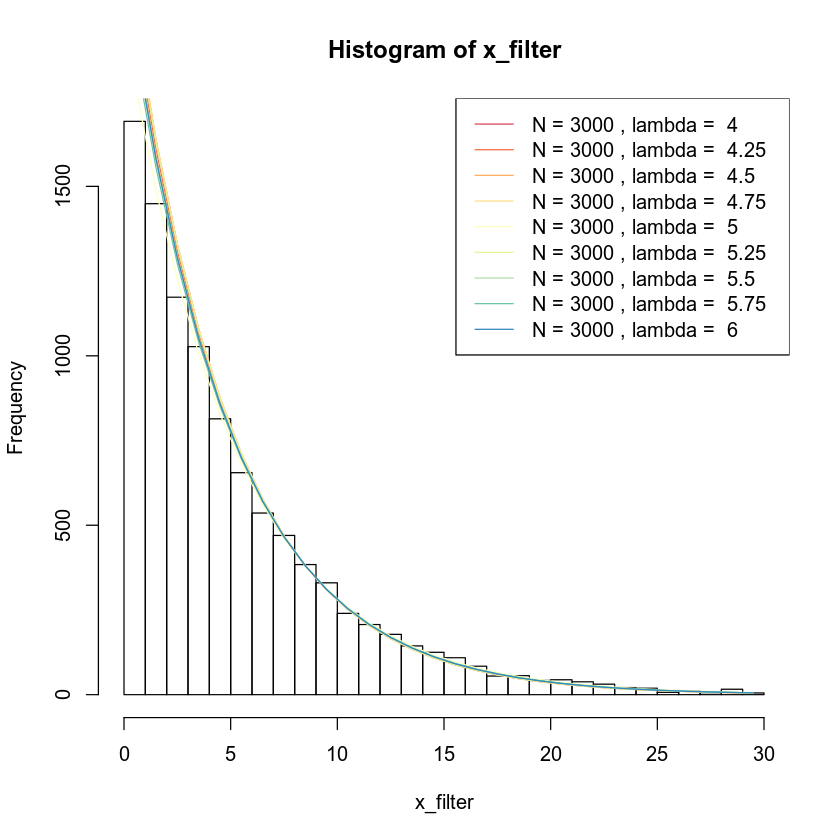

In [21]:
# set lambda values
lambda_iter <- seq(from = 4, to = 6, by = 0.25)


# Set N values
N_iter <- rep(3000, length(lambda_iter))


# Color palette
cols <- brewer.pal(length(N_iter), 'Spectral')

# Plot histogram
my_hist <- hist(x_filter, breaks = 30)

# Cosider each (N, lambda) tuple
foreach (N = N_iter, lambda = lambda_iter, i = c(1:length(N_iter))) %do% {
    
    # Maximum likelihood estimator
    mle_res <- mle(minuslogl = nll, 
                     start = list(N = N, lambda = lambda), 
                     method = "BFGS")
        
    cat(bold(red(paste("Initial values: N_0 =", N, "; Lambda_0 =", lambda))))
    cat("\n")
    cat(bold(green(paste("Values after MLE: N =", mle_res@coef[[1]], "; Lambda =", mle_res@coef[[2]]))))
    cat("\n", "\n")
    
    # Overlap lines
    lines(t, mle_res@coef[[1]]*exp(-t / mle_res@coef[[2]]), 
              col = cols[i])
}

# Add legend
legend("topright", lty = 1,
       c(paste('N =', N_iter[1], ', lambda = ', lambda_iter[1]),
         paste('N =', N_iter[2], ', lambda = ', lambda_iter[2]),
         paste('N =', N_iter[3], ', lambda = ', lambda_iter[3]),
         paste('N =', N_iter[4], ', lambda = ', lambda_iter[4]),
         paste('N =', N_iter[5], ', lambda = ', lambda_iter[5]),
         paste('N =', N_iter[6], ', lambda = ', lambda_iter[6]),
         paste('N =', N_iter[7], ', lambda = ', lambda_iter[7]),
         paste('N =', N_iter[8], ', lambda = ', lambda_iter[8]),
         paste('N =', N_iter[9], ', lambda = ', lambda_iter[9])),
         col = cols[1:length(N_iter)])